<a href="https://colab.research.google.com/github/jrebull/MIAAD_Mate/blob/main/09_taller_extremos_fvv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimización de funciones multivariables y su aplicación en el Método de Mínimos Cuadrados

Queremos ajustar una recta a datos mediante mínimos cuadrados.
La función de pérdida (error medio cuadrático) es:
$$
L(w,b) = \frac 1n \sum\limits_{i=1}^n (y_i -(wx_i + b))^2
$$

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
# 1) ENTRADA DE PUNTOS

pts = [(1, 2), (2, 3), (3, 5)]

In [3]:
# --- Validaciones básicas ---
if len(pts) < 2:
    raise ValueError("Se requieren al menos 2 puntos para ajustar una recta.")
x_np = np.array([p[0] for p in pts], dtype=float)
y_np = np.array([p[1] for p in pts], dtype=float)
if np.allclose(x_np.var(), 0.0):
    raise ValueError("Todos los x son iguales: Var(x)=0. No se puede ajustar una recta única.")

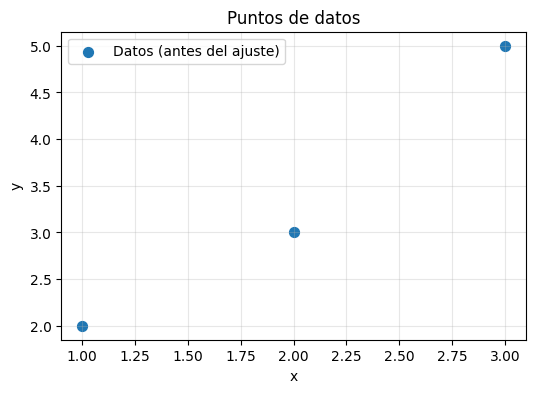

In [4]:
# 2) GRAFICAR PUNTOS (PRIMER PASO)
plt.figure(figsize=(6,4))
plt.scatter(x_np, y_np, s=50, label="Datos (antes del ajuste)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Puntos de datos")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [5]:
# 3) FORMULACIÓN SIMBÓLICA DEL PROBLEMA (MSE)
#    L(w,b) = (1/n) * sum_i (y_i - (w x_i + b))^2

w, b = sp.symbols('w b', real=True)
n = len(pts)
L = sum([(y_np[i] - (w * x_np[i] + b))**2 for i in range(n)]) / n
Lw = sp.diff(L, w)
Lb = sp.diff(L, b)
print('Lw = ',Lw)
print('Lb = ',Lb)

Lw =  4.0*b + 9.33333333333333*w - 15.3333333333333
Lb =  2.0*b + 4.0*w - 6.66666666666667


In [6]:
# Condiciones de 1er orden: ∂L/∂w=0, ∂L/∂b=0
# Resolver el sistema para (w*, b*)

sol = sp.solve([Lw, Lb], (w, b), dict=True)
if not sol:
    raise RuntimeError("No se obtuvo solución para (w, b).")
sol = sol[0]
w_star = sp.N(sol[w])
b_star = sp.N(sol[b])
print(sol)

{b: 0.333333333333333, w: 1.50000000000000}


In [7]:
# Hessiana y clasificación del crítico

H = sp.hessian(L, (w, b))
H_eval = H.subs({w: w_star, b: b_star})
detH = sp.det(H_eval)
print("\nHessiana evaluada en (w*, b*):")
sp.pprint(H_eval)
print(f"\ndet(H) = {sp.N(detH)}")


Hessiana evaluada en (w*, b*):
⎡9.33333333333333  4.0⎤
⎢                     ⎥
⎣      4.0         2.0⎦

det(H) = 2.66666666666667


In [8]:
# Criterio de 2ª derivada en 2D:
# det(H) > 0 y L_ww > 0  -> mínimo local.
# Para MSE lineal, H = (2/n) * [[sum x_i^2, sum x_i],[sum x_i, n]], PD si Var(x)>0.
if detH > 0 and H_eval[0,0] > 0:
    print("Clasificación: mínimo local (suficiente).")
else:
    print("Clasificación: no es mínimo estricto (revisar Var(x) o degeneración).")

Clasificación: mínimo local (suficiente).


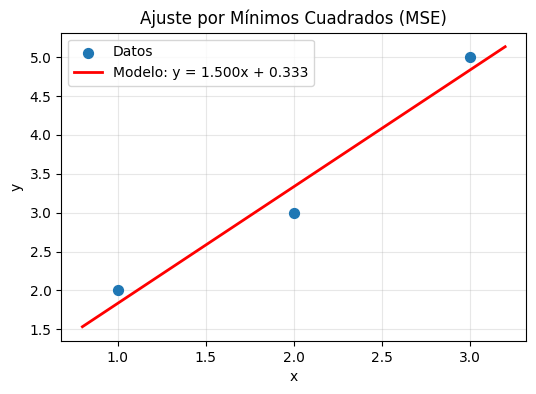

In [10]:
# 5) GRAFICAR MODELO AJUSTADO (SEGUNDO PASO)
# Usamos la solución simbólica
w_plot = float(w_star)
b_plot = float(b_star)

# CORRECCIÓN: usar np.ptp() en lugar de x_np.ptp()
x_line = np.linspace(x_np.min() - 0.1*(np.ptp(x_np)+1e-9),
                     x_np.max() + 0.1*(np.ptp(x_np)+1e-9), 200)
y_line = w_plot * x_line + b_plot

plt.figure(figsize=(6,4))
plt.scatter(x_np, y_np, s=50, label="Datos", zorder=3)
plt.plot(x_line, y_line, linewidth=2,
         label=f"Modelo: y = {w_plot:.3f}x + {b_plot:.3f}", color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por Mínimos Cuadrados (MSE)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()